In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import graphviz


#PREPARING THE DATASETS

In [13]:
bc_file_path = 'wdbc.data'

column_names = [
    'ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

breast_cancer_df = pd.read_csv(bc_file_path, header=None, names=column_names)


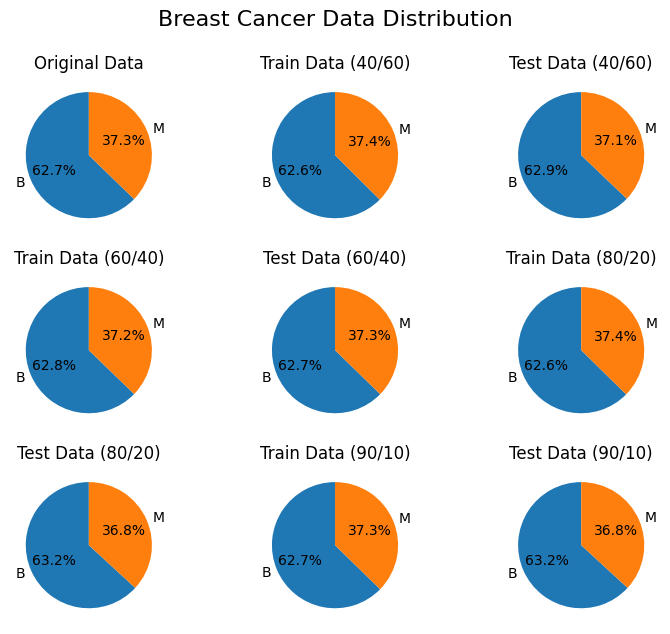

In [19]:
feature_names = breast_cancer_df.drop(columns=['ID', 'Diagnosis']).columns.tolist()
features = breast_cancer_df.drop(columns=['ID', 'Diagnosis']).values
labels = breast_cancer_df['Diagnosis'].map({'M': 1, 'B': 0}).values

split_ratio = {
    "40/60": 0.6,
    "60/40": 0.4,
    "80/20": 0.2,
    "90/10": 0.1,
}
breastcancer_slipt = {}

# print("ratio between M and B:", np.sum(labels == 1) / np.sum(labels == 0))

for name, test_ratio in split_ratio.items():
    train_ratio = 1 - test_ratio
    feature_train, feature_test, label_train, label_test = sklearn.model_selection.train_test_split(
        features, labels, 
        test_size=test_ratio, 
        random_state=42, 
        shuffle = True, 
        stratify=labels
    )
    breastcancer_slipt[name] = {
        "feature_train": feature_train,
        "feature_test": feature_test,
        "label_train": label_train,
        "label_test": label_test
    }
    # print(f"Split {name}:")
    # print(f"  Train size: {len(feature_train)}")
    # print(f"  Test size: {len(feature_test)}")
    # print(f"  Train features shape: {feature_train.shape}")
    # print(f"  Test features shape: {feature_test.shape}")
    # print(f"  Train labels shape: {label_train.shape}")
    # print(f"  Test labels shape: {label_test.shape}")
    # print("ratio between M and B in train:", np.sum(label_train == 1) / np.sum(label_train == 0))
    # print("ratio between M and B in test:", np.sum(label_test == 1) / np.sum(label_test == 0))

lists = [
    labels,
    breastcancer_slipt["40/60"]["label_train"],
    breastcancer_slipt["40/60"]["label_test"],
    breastcancer_slipt["60/40"]["label_train"],
    breastcancer_slipt["60/40"]["label_test"],
    breastcancer_slipt["80/20"]["label_train"],
    breastcancer_slipt["80/20"]["label_test"],
    breastcancer_slipt["90/10"]["label_train"],
    breastcancer_slipt["90/10"]["label_test"],
]

plot_pie_labels = [
    "Original Data",
    "Train Data (40/60)",
    "Test Data (40/60)",
    "Train Data (60/40)",
    "Test Data (60/40)",
    "Train Data (80/20)",
    "Test Data (80/20)",
    "Train Data (90/10)",
    "Test Data (90/10)"
]

def visualize_data(data, plot, title):
    plt.figure(figsize=(8, 6))
    for i, d in enumerate(data):
        plt.subplot(3, 3, i + 1)
        plt.pie([np.sum(d == 0), np.sum(d == 1)], labels=['B', 'M'], autopct='%1.1f%%', startangle=90)
        plt.title(plot[i])
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.05)
    plt.show()

visualize_data(lists, plot_pie_labels, "Breast Cancer Data Distribution")  


#BUILDING THE DESICION TREE CLASSIFIERS